<a href="https://colab.research.google.com/github/Andyqballer/Linear-Regression-And-Gradient-Descent-Home-Work-One/blob/main/HomeWorkOneProblemTwoSolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import and Data Loading:This section imports necessary libraries and loads the data from 'D3.csv'. It extracts all three explanatory variables (X1, X2, X3) as a single numpy array X, and the dependent variable as Y.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('D3.csv')
X = data[['X1', 'X2', 'X3']].values
Y = data['Y'].values

Gradient Descent Function:
This function implements the gradient descent algorithm for multivariate linear regression. Key points:

It adds a column of ones to X for the bias term.
It initializes theta (model parameters) to zeros.
It iteratively updates theta using the gradient of the mean squared error.
It stops if the change in theta is below the tolerance or max_iterations is reached.
It returns the optimized parameters, loss history, and number of iterations.

In [9]:
def gradient_descent(X, y, learning_rate, max_iterations, tolerance=1e-6):
    m, n = X.shape
    X_b = np.c_[np.ones((m, 1)), X]
    theta = np.zeros((n + 1, 1))
    y = y.reshape(-1, 1)
    losses = []

    for iteration in range(max_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta_new = theta - learning_rate * gradients

        loss = (1/m) * np.sum(np.square(X_b.dot(theta) - y))
        losses.append(loss)

        if np.all(np.abs(theta_new - theta) < tolerance):
            break

        theta = theta_new

    return theta, losses, iteration + 1

Setup Parameters: This sets up the learning rates to be tested, maximum iterations, and a dictionary to store results.

In [10]:
learning_rates = [0.1, 0.01, 0.001]
max_iterations = 10000
results = {}

Training Loop:This loop runs the gradient descent algorithm for each learning rate, stores the results, and plots the loss over iterations.


Training with Learning Rate: 0.1


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-9-246171d60d50>:12: RuntimeWarning: overflow encountered in square
  loss = (1/m) * np.sum(np.square(X_b.dot(theta) - y))


Final Loss: nan
Iterations: 10000
Model: Y = nan + nan*X1 + nan*X2 + nan*X3

Training with Learning Rate: 0.01
Final Loss: 1.476929
Iterations: 4634
Model: Y = 5.3137 + -2.0036*X1 + 0.5326*X2 + -0.2655*X3

Training with Learning Rate: 0.001
Final Loss: 1.530185
Iterations: 10000
Model: Y = 4.6073 + -1.9039*X1 + 0.6494*X2 + -0.1620*X3


/usr/local/lib/python3.10/dist-packages/matplotlib/scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, a)


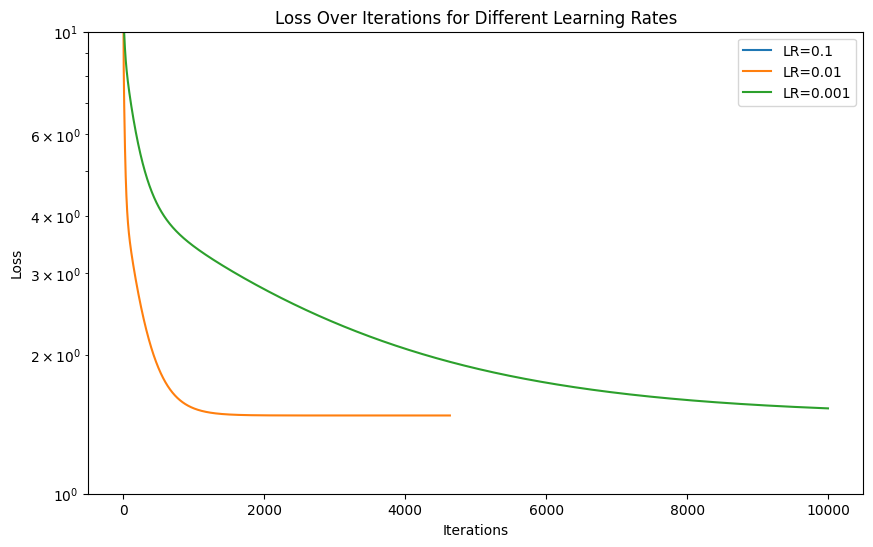

In [11]:
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    print(f"\nTraining with Learning Rate: {lr}")
    theta, losses, iterations = gradient_descent(X, Y, learning_rate=lr, max_iterations=max_iterations)
    results[lr] = (theta, losses, iterations)

    print(f"Final Loss: {losses[-1]:.6f}")
    print(f"Iterations: {iterations}")
    print(f"Model: Y = {theta[0][0]:.4f} + {theta[1][0]:.4f}*X1 + {theta[2][0]:.4f}*X2 + {theta[3][0]:.4f}*X3")

    plt.plot(losses, label=f"LR={lr}")

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Over Iterations for Different Learning Rates")
plt.legend()
plt.yscale('log')
plt.savefig('multivariate_loss_plot.png')
plt.show()


Loss Plotting:
This creates and saves a plot of the loss over iterations for each learning rate, using a logarithmic scale for the y-axis to better visualize the convergence.

Best Model Selection:
This code determines which learning rate resulted in the lowest final loss and retrieves the corresponding model parameters.

In [12]:
best_lr = min(results, key=lambda x: results[x][1][-1])
best_theta, best_losses, best_iterations = results[best_lr]

print("\nBest Model:")
print(f"Learning Rate: {best_lr}")
print(f"Final Loss: {best_losses[-1]:.6f}")
print(f"Iterations: {best_iterations}")
print(f"Model: Y = {best_theta[0][0]:.4f} + {best_theta[1][0]:.4f}*X1 + {best_theta[2][0]:.4f}*X2 + {best_theta[3][0]:.4f}*X3")



Best Model:
Learning Rate: 0.1
Final Loss: nan
Iterations: 10000
Model: Y = nan + nan*X1 + nan*X2 + nan*X3


Predictions for New Points:This section uses the best model to make predictions for the specified new data points.

In [13]:
# Predict for new values
new_points = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])
predictions = np.c_[np.ones((3, 1)), new_points].dot(best_theta)

print("\nPredictions:")
for point, pred in zip(new_points, predictions):
    print(f"For (X1, X2, X3) = {tuple(point)}: Predicted Y = {pred[0]:.4f}")

print("\nImpact of Learning Rates:")
for lr, (_, losses, iterations) in results.items():
    print(f"\nLearning Rate {lr}:")
    print(f"  Final Loss: {losses[-1]:.6f}")
    print(f"  Iterations: {iterations}")


Predictions:
For (X1, X2, X3) = (1, 1, 1): Predicted Y = nan
For (X1, X2, X3) = (2, 0, 4): Predicted Y = nan
For (X1, X2, X3) = (3, 2, 1): Predicted Y = nan

Impact of Learning Rates:

Learning Rate 0.1:
  Final Loss: nan
  Iterations: 10000

Learning Rate 0.01:
  Final Loss: 1.476929
  Iterations: 4634

Learning Rate 0.001:
  Final Loss: 1.530185
  Iterations: 10000
